# Import all the required libraries

---



In [2]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [3]:
START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [4]:
data = load_data('VEDL.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,VEDL.NS,VEDL.NS,VEDL.NS,VEDL.NS,VEDL.NS,VEDL.NS
0,2015-01-01,71.525063,219.250000,219.699997,212.199997,213.699997,2304326
1,2015-01-02,72.520035,222.300003,224.449997,219.350006,219.350006,3270358
2,2015-01-05,71.704475,219.800003,225.300003,218.100006,222.500000,3512083
3,2015-01-06,68.197540,209.050003,219.500000,206.750000,217.949997,6095798
4,2015-01-07,68.181229,209.000000,211.850006,204.149994,209.000000,3410940


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

<ipython-input-5-8097d146b7ad>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,VEDL.NS,VEDL.NS,VEDL.NS,VEDL.NS,VEDL.NS
0,219.250000,219.699997,212.199997,213.699997,2304326
1,222.300003,224.449997,219.350006,219.350006,3270358
2,219.800003,225.300003,218.100006,222.500000,3512083
3,209.050003,219.500000,206.750000,217.949997,6095798
4,209.000000,211.850006,204.149994,209.000000,3410940


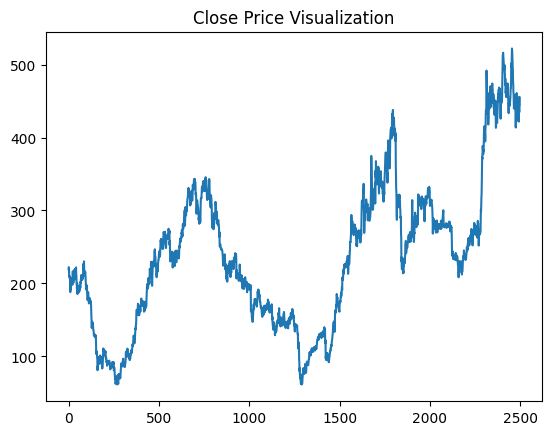

In [6]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [7]:
df

Price,Close,High,Low,Open,Volume
Ticker,VEDL.NS,VEDL.NS,VEDL.NS,VEDL.NS,VEDL.NS
0,219.250000,219.699997,212.199997,213.699997,2304326
1,222.300003,224.449997,219.350006,219.350006,3270358
2,219.800003,225.300003,218.100006,222.500000,3512083
3,209.050003,219.500000,206.750000,217.949997,6095798
4,209.000000,211.850006,204.149994,209.000000,3410940
...,...,...,...,...,...
2492,437.700012,443.000000,428.700012,428.700012,9934297
2493,444.450012,447.850006,437.700012,438.950012,7176758
2494,443.750000,450.250000,442.299988,445.100006,5475073


# Plotting moving averages of 100 day

---



In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,VEDL.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2492,464.4260
2493,464.3300
2494,464.3045
2495,464.3645


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

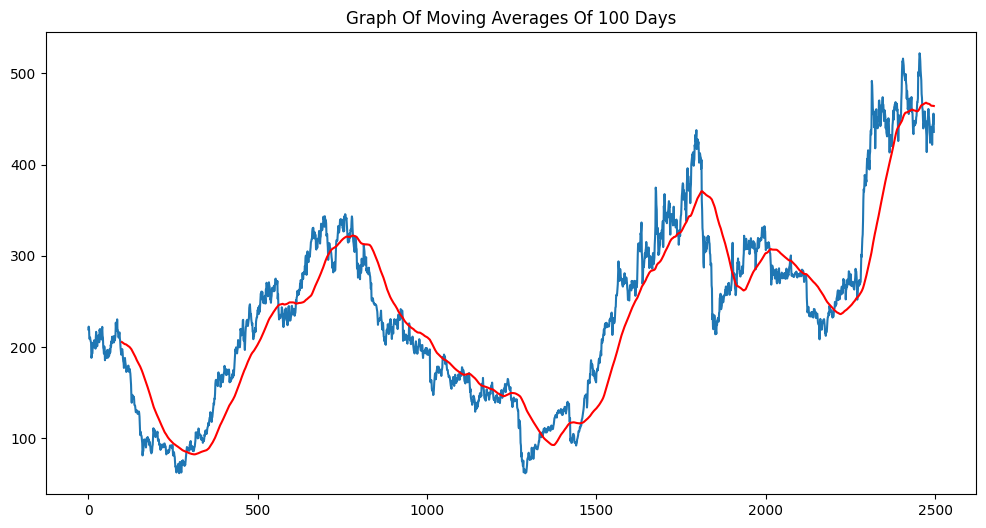

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,VEDL.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2492,452.93575
2493,453.22825
2494,453.54200
2495,453.93575


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

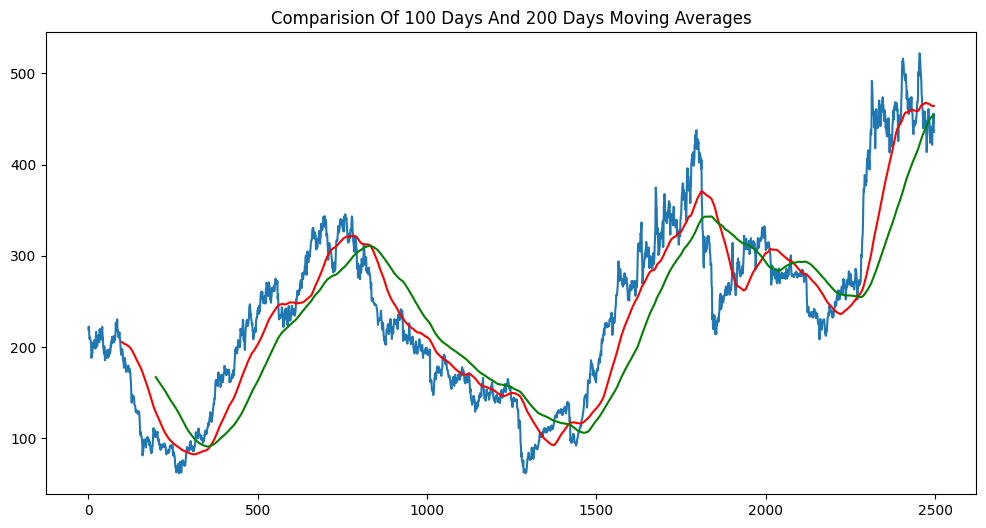

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [12]:
df.shape

(2497, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [13]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1747, 7)
(750, 7)


In [14]:
train.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,VEDL.NS,VEDL.NS,VEDL.NS,VEDL.NS,VEDL.NS,VEDL.NS
0,2015-01-01,71.525063,219.250000,219.699997,212.199997,213.699997,2304326
1,2015-01-02,72.520035,222.300003,224.449997,219.350006,219.350006,3270358
2,2015-01-05,71.704475,219.800003,225.300003,218.100006,222.500000,3512083
3,2015-01-06,68.197540,209.050003,219.500000,206.750000,217.949997,6095798
4,2015-01-07,68.181229,209.000000,211.850006,204.149994,209.000000,3410940


In [15]:
test.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,VEDL.NS,VEDL.NS,VEDL.NS,VEDL.NS,VEDL.NS,VEDL.NS
1747,2022-01-31,182.492920,321.750000,330.649994,315.500000,330.000000,14273583
1748,2022-02-01,191.794769,338.149994,339.000000,322.000000,323.899994,12026843
1749,2022-02-02,194.687485,343.250000,344.000000,336.149994,339.000000,8070763
1750,2022-02-03,195.850220,345.299988,351.799988,329.149994,335.000000,15147036
1751,2022-02-04,202.117630,356.350006,362.750000,343.600006,345.000000,20184671


# Using MinMax scaler for normalization of the dataset

---



In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [18]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.50741105],
       [0.53096181],
       [0.52684455],
       ...,
       [0.82032283],
       [0.83629772],
       [0.872859  ]])

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.shape

(1647, 100, 1)

# ML Model (LSTM)

---



In [21]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [25]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

# Prepare data for LSTM
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

data_training_array = scaler.fit_transform(train_close)

x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Prepare x_test and y_test before model fitting
past_100_days = train_close[-100:]
final_df = np.concatenate([past_100_days, test_close], axis=0)
# or final_df = np.append(past_100_days, test_close, axis=0)

input_data = scaler.transform(final_df)

x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

# Now you can compile and fit your model:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train, validation_data = (x_test, y_test) ,epochs = 50)

(1747, 7)
(750, 7)
(750, 100, 1)
(750,)
Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 25s 222ms/step - MAE: 0.2393 - loss: 0.1054 - val_MAE: 0.1438 - val_loss: 0.0313
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - MAE: 0.0846 - loss: 0.0121 - val_MAE: 0.0836 - val_loss: 0.0144
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - MAE: 0.0718 - loss: 0.0094 - val_MAE: 0.1036 - val_loss: 0.0165
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - MAE: 0.0694 - loss: 0.0085 - val_MAE: 0.0657 - val_loss: 0.0093
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - MAE: 0.0642 - loss: 0.0077 - val_MAE: 0.0891 - val_loss: 0.0145
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - MAE: 0.0683 - loss: 0.0083 - val_MAE: 0.0665 - val_loss: 0.0095
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - MAE: 0.0614 - loss: 0.0068 - val_MAE: 0.1143 - val_loss: 0.0203
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - MAE: 0.0639 - loss: 0.0070 - val_MAE: 0.0724 - val_loss: 0.0108
Epoch 9/50
52/52 ━━━━━

In [26]:
model.save('keras_model.h5')

In [27]:

test_close.shape
test_close

array([[315.5       ],
       [322.        ],
       [336.1499939 ],
       [329.1499939 ],
       [343.6000061 ],
       [355.95001221],
       [359.29998779],
       [364.20001221],
       [375.5       ],
       [372.25      ],
       [359.6000061 ],
       [355.45001221],
       [362.04998779],
       [365.6000061 ],
       [362.5       ],
       [353.1000061 ],
       [339.3500061 ],
       [348.1000061 ],
       [335.70001221],
       [345.5       ],
       [356.75      ],
       [382.        ],
       [383.29998779],
       [370.5       ],
       [373.45001221],
       [372.5       ],
       [365.45001221],
       [363.45001221],
       [376.20001221],
       [371.6499939 ],
       [353.79998779],
       [359.29998779],
       [373.5       ],
       [380.54998779],
       [402.        ],
       [398.        ],
       [407.        ],
       [406.25      ],
       [406.        ],
       [407.54998779],
       [396.54998779],
       [399.25      ],
       [403.20001221],
       [406

In [28]:
past_100_days = pd.DataFrame(train_close[-100:])

In [29]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [30]:
final_df = past_100_days.append(test_df, ignore_index = True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [31]:
final_df.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [32]:
input_data = scaler.fit_transform(final_df)
input_data

array([[3.32258065e-01],
       [3.25161251e-01],
       [2.83870968e-01],
       [2.98870948e-01],
       [3.10967722e-01],
       [3.11451574e-01],
       [3.13548426e-01],
       [3.17258084e-01],
       [2.92580685e-01],
       [2.52903206e-01],
       [2.48225846e-01],
       [2.73064496e-01],
       [2.97096794e-01],
       [2.75645201e-01],
       [2.60967722e-01],
       [2.55967762e-01],
       [2.61290323e-01],
       [2.59677419e-01],
       [2.48870948e-01],
       [2.58548367e-01],
       [3.00645201e-01],
       [2.67741935e-01],
       [2.71290342e-01],
       [2.79516109e-01],
       [2.79677459e-01],
       [2.96451593e-01],
       [3.42580685e-01],
       [3.80645161e-01],
       [4.49193548e-01],
       [5.02419355e-01],
       [4.58709717e-01],
       [4.22741896e-01],
       [3.71451593e-01],
       [3.50322600e-01],
       [3.69193588e-01],
       [3.49354799e-01],
       [2.87096774e-01],
       [2.91612884e-01],
       [3.03225806e-01],
       [3.20000039e-01],


In [33]:
input_data.shape

(850, 1)

# Testing the model

---



In [34]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [35]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(750, 100, 1)
(750,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [36]:
# Making predictions

y_pred = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step


In [37]:
y_pred.shape

(750, 1)

In [38]:
y_test

array([3.53225806e-01, 3.74193548e-01, 4.19838690e-01, 3.97258045e-01,
       4.43870987e-01, 4.83709717e-01, 4.94516090e-01, 5.10322620e-01,
       5.46774194e-01, 5.36290323e-01, 4.95483891e-01, 4.82096814e-01,
       5.03387057e-01, 5.14838729e-01, 5.04838710e-01, 4.74516149e-01,
       4.30161310e-01, 4.58387116e-01, 4.18387136e-01, 4.50000000e-01,
       4.86290323e-01, 5.67741935e-01, 5.71935444e-01, 5.30645161e-01,
       5.40161330e-01, 5.37096774e-01, 5.14354878e-01, 5.07903265e-01,
       5.49032297e-01, 5.34354819e-01, 4.76774154e-01, 4.94516090e-01,
       5.40322581e-01, 5.63064477e-01, 6.32258065e-01, 6.19354839e-01,
       6.48387097e-01, 6.45967742e-01, 6.45161290e-01, 6.50161251e-01,
       6.14677380e-01, 6.23387097e-01, 6.36129072e-01, 6.45161290e-01,
       6.81935464e-01, 6.71935444e-01, 7.04193509e-01, 7.05483910e-01,
       7.24032297e-01, 6.71451593e-01, 6.94838690e-01, 6.86290323e-01,
       6.96935444e-01, 6.82258065e-01, 6.81129013e-01, 6.73548348e-01,
      

In [39]:
y_pred

array([[0.32617903],
       [0.32521588],
       [0.32658678],
       [0.33165202],
       [0.34077403],
       [0.35379988],
       [0.37095988],
       [0.39154226],
       [0.41473112],
       [0.43944216],
       [0.4640436 ],
       [0.4842577 ],
       [0.49421424],
       [0.49440894],
       [0.4893183 ],
       [0.48220158],
       [0.47346097],
       [0.46012455],
       [0.44403675],
       [0.4262523 ],
       [0.41057974],
       [0.40194046],
       [0.4046963 ],
       [0.41707215],
       [0.43613788],
       [0.45893055],
       [0.4824521 ],
       [0.5020908 ],
       [0.5128865 ],
       [0.5164784 ],
       [0.5154605 ],
       [0.5089742 ],
       [0.49883622],
       [0.4899699 ],
       [0.4872238 ],
       [0.49275807],
       [0.50526077],
       [0.5233435 ],
       [0.54509306],
       [0.5682404 ],
       [0.5905783 ],
       [0.60795635],
       [0.6169603 ],
       [0.6183511 ],
       [0.6156741 ],
       [0.61491317],
       [0.61752945],
       [0.624

In [40]:
scaler.scale_

array([0.00322581])

In [41]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

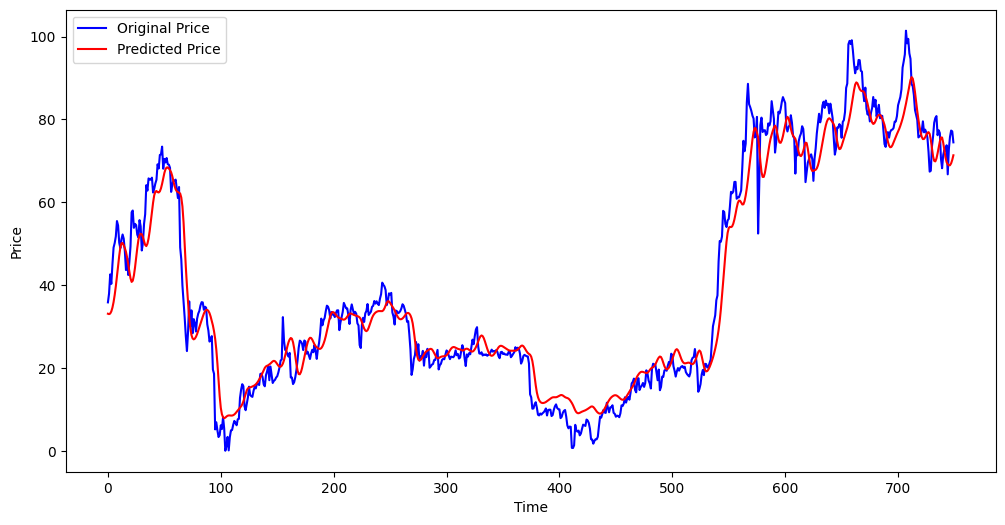

In [42]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Model evaluation

In [43]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  4.26337350817332
